# Sistema con \\(N \gg 1\\) grados de libertad forzado

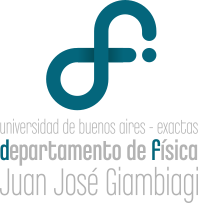  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Enunciado

Este arreglo lineal de péndulos acoplados tiene extremos en $z= 0$ y en $z= L$.
Se aplica una fuerza externa en función del tiempo a la primera masa ($z=0$), de forma tal que se conoce su amplitud $\psi(0,t)= A_0 \cos(\Omega t)$.
Halle el movimiento estacionario del sistema y discuta las hipótesis que hace.
Compare con el caso de extremo derecho fijo a una pared (o sea: agregando un resorte a la derecha de la última masa y uniéndolo a la pared).   
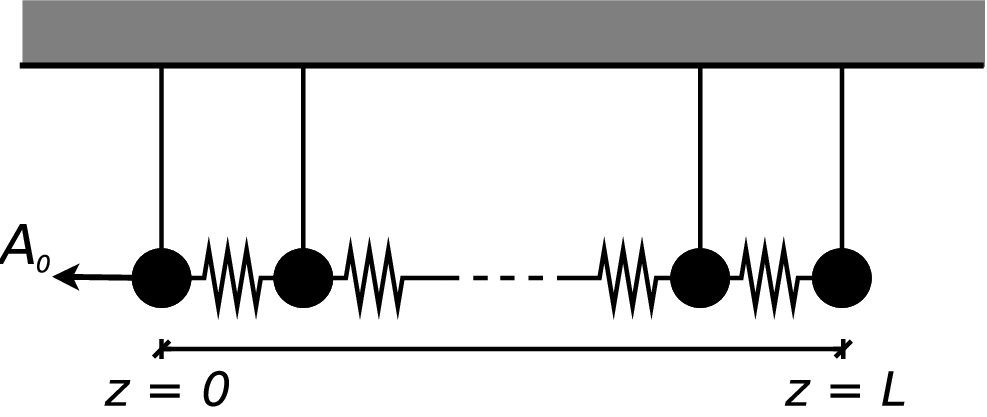

## Péndulos idénticos acoplados

> Bibliografía:  
> - Sección 3.2 "Péndulos idénticos acoplados"   
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

Hay \\(n\\) hilos rígidos inextensibles de masa despreciables frente a la de las sendas partículas que de ellas penden.
Cuando estas partículas no están perturbadas están equiespaciadas en \\(a\\).
Puesto que están enlazadas entre sí por resortes su longitud natural debe coincidir con esta distancia \\(l_0 = a\\).
Los resortes tendrán su correspondiente coeficiente de dureza \\(K\\).

Como coordenadas utilizaremos los desplazamientos laterales de los péndulos \\(\psi_n\\).
En pequeñas oscilaciones este es similar al arco descripto cuando se produce un apartamiento con un ángulo \\(\varphi_n\\) con la vertical.
Entonces \\( \psi_n \simeq \ell \varphi_n\\) siendo \\(\ell\\) la longitud del péndulo.

Con esto la energía potencial gravitatoria de cada una de las \\(n\\) partículas es
$$
    V_\text{gravitatoria}
    = -m g \ell (1 - \cos(\varphi_n) ) 
    \simeq -m g \ell \left( 1- (1- \frac{\varphi_n^2}{2}) \right) 
    = m g \ell \frac{\varphi_n^2}{2}
    = m g \frac{\psi_n^2}{2 \ell}.
$$

In [2]:
t = sym.Symbol('t')
m, g, l, K, a, l_0 = sym.symbols('m, g, \ell, K, a, l_0', positive=True) # parámetros físicos

# psi_nMinus = sym.Function('\psi_{n-1}')(t)
# psi_n = sym.Function('\psi_{n}')(t)
# psi_nPlus = sym.Function('\psi_{n+1}')(t)
psi_nMinus, psi_n, psi_nPlus = mech.dynamicsymbols('\psi_{n-1}, \psi_n, \psi_{n+1}')

l_izquierdo = a + (psi_n- psi_nMinus)
l_derecho = a + (psi_nPlus - psi_n)

V = sym.Eq(sym.Function('V')(psi_nMinus, psi_n, psi_nPlus),
           K/2* ( (l_izquierdo - l_0 )**2 + (l_derecho - l_0 )**2)
           + m* g* psi_n**2/ (2*l)
          )
V

Eq(V(\psi_{n-1}(t), \psi_n(t), \psi_{n+1}(t)), K*((a - l_0 - \psi_n(t) + \psi_{n+1}(t))**2 + (a - l_0 + \psi_n(t) - \psi_{n-1}(t))**2)/2 + g*m*\psi_n(t)**2/(2*\ell))

In [3]:
desplazamientos = [psi_nMinus, psi_n, psi_nPlus]
newton_agrupada = sym.Eq(psi_n.diff(t,2), (-(1/m)* V.rhs.diff(psi_n) ).expand().collect(desplazamientos) ) 
newton_agrupada

Eq(Derivative(\psi_n(t), (t, 2)), K*\psi_{n+1}(t)/m + K*\psi_{n-1}(t)/m + (-2*K/m - g/\ell)*\psi_n(t))

Ya vimos como de está expresión puede obtenerse la relación de dispersión
$$
\left(\omega^{(p)}\right)^2 = \omega_0^2 + \frac{4 K}{m} \sin^2(\frac{k^{(p)} a}{2}),
$$
con \\(\omega_0^2= \frac{g}{l}\\).

Si dejamos de lado el término con $\omega_0^2$

In [4]:
newton_n_inicial = sym.Eq(psi_n.diff(t,2), -(1/m)*V.rhs.diff(psi_n) ).expand()
newton_n_inicial

Eq(Derivative(\psi_n(t), (t, 2)), -2*K*\psi_n(t)/m + K*\psi_{n+1}(t)/m + K*\psi_{n-1}(t)/m - g*\psi_n(t)/\ell)

y nos quedamos con los tres primeros a la derecha de la igualdad

In [5]:
terminosDiferencias = newton_n_inicial.rhs.args[0] + newton_n_inicial.rhs.args[1] + newton_n_inicial.rhs.args[3]
terminosDiferencias

-2*K*\psi_n(t)/m + K*\psi_{n+1}(t)/m + K*\psi_{n-1}(t)/m

vemos que pueden ordenarse como diferencias
$$
\frac{K}{m} \left( \psi_{n+1} + \psi_{n-1} - 2 \psi_n \right)
= \frac{K}{m} \left[ (\psi_{n+1} - \psi_n) - (\psi_n - \psi_{n-1}) \right].
$$

Cada una de estas diferencias aparece al avanzar en $a$ pasando de una partícula a la siguiente.
Puedo normalizar las diferencias con este desplazamiento
$$
\frac{K}{m} \left( \psi_{n+1} + \psi_{n-1} - 2 \psi_n \right)
= \frac{K a}{m} \left[ \frac{\psi_{n+1} - \psi_n}{a} - \frac{\psi_n - \psi_{n-1}}{a} \right].
$$

Si tal separación tendiera a desaparecer tales saltos serían asimilables a una derivada
$$
\lim_{a \to 0} \frac{K}{m} \left( \psi_{n+1} + \psi_{n-1} - 2 \psi_n \right)
\sim \frac{K}{\lambda_m} \left[ \frac{\partial \psi}{\partial z}|_{\sim n+1} - \frac{\partial \psi}{\partial z}|_{\sim n-1} \right],
$$
donde aparece una densidad lineal de masa \\(\lambda_m = \frac{m}{a}\\).

Insistiendo con la idea, si tengo dos derivadas primeras sucesivas evaluadas muy próxima una de la otra puedo repetir el procedimiento para obtener 
$$
\frac{K}{m} \left( \psi_{n+1} + \psi_{n-1} - 2 \psi_n \right)
= \frac{K a}{\lambda_m} \frac{ \frac{\psi_{n+1} - \psi_n}{a} - \frac{\psi_n - \psi_{n-1}}{a} }{a},
$$
que en el límite continuo
$$
\lim_{a \to 0} \frac{K}{m} \left( \psi_{n+1} + \psi_{n-1} - 2 \psi_n \right)
= \frac{T_0}{\lambda_m} \frac{\partial^2 \psi}{\partial z^2}|_n,
$$
donde aparece una tensión, \\(T_0 = K a\\), que es una forma para el continuo de la fuerza que harían los resortes entre partículas separadas por $a$.

## Ecuación de Klein-Gordon

> Bibliografía:  
> - Sección 3.3.3 "Péndulos acoplados -> ecuación de Klein-Gordon"  
  [Ondas](http://bit.ly/F2Depinev02)  
  Ricardo Depine   
  v.5, 2020

Con todo lo anterior se pudo llevar la 2.a ley de Newton que obtuvimos para este sistema al caso continuo.

In [6]:
z= sym.Symbol('z')
T0, lambda_m = sym.symbols('T_0, lambda_m', positive=True)
psi = sym.Function('\psi')(z,t)
subtitucionesContinuo= {
    terminosDiferencias: (T0/ lambda_m)* psi.diff(z,2),
    psi_n: psi,
}
newton_continuo = newton_n_inicial.subs(subtitucionesContinuo)
newton_continuo

Eq(Derivative(\psi(z, t), (t, 2)), T_0*Derivative(\psi(z, t), (z, 2))/lambda_m - g*\psi(z, t)/\ell)

Tal ecuación se parece bastante a la ecuación de ondas clásica en la que $v$ es la velocidad de fase.

En una _cadena de masisitas infinítamente pequeñas y próximas_, i.e. una cuerda, es justamente $v^2 = \frac{T_0}{\lambda_m}$.

In [7]:
v = sym.Symbol('v', positive= True) # la velocidad de onda
sym.Eq(psi.diff(t,2), v**2* psi.diff(z,2))

Eq(Derivative(\psi(z, t), (t, 2)), v**2*Derivative(\psi(z, t), (z, 2)))

La solución para esta ecuación

In [8]:
A, k, alpha, omega, phi = sym.symbols('A, k, alpha, omega, phi') 
solución_continuo = sym.Eq(psi, A* sym.cos(k* z+ alpha)* sym.cos(omega* t + phi) )
solución_continuo

Eq(\psi(z, t), A*cos(alpha + k*z)*cos(omega*t + phi))

Reemplazando esta solución en la ecuación de ondas clásica se halla la relación de dispersión
$$
\omega^2 = v^2 k^2.
$$

En la ecuación que obtuvimos hay un término adicional
$$
- \omega_0^2 \psi(z,t)
$$
que hace que al aplicar esta solución hace que también aparezca un término adicional en la relación de dispersión

In [9]:
dispersión_continuo = sym.Eq(omega**2, (T0/ lambda_m)* k**2 + g/l )
dispersión_continuo

Eq(omega**2, T_0*k**2/lambda_m + g/\ell)

Escribiendo en términos de $v$ y $\omega_0$ tal relación 

In [10]:
omega_0 = sym.Symbol('\omega_0')
dispersión_KG = dispersión_continuo.subs([(T0/ lambda_m, v**2),(g/l, omega_0**2) ] )
dispersión_KG

Eq(omega**2, \omega_0**2 + k**2*v**2)

es la de la llamada **ecuación de Klein-Gordon** unidimensional clásica

In [19]:
ecuación_KG = newton_continuo.subs([(T0/ lambda_m, v**2),(g/l, omega_0**2) ] )
ecuación_KG

Eq(Derivative(\psi(z, t), (t, 2)), -\omega_0**2*\psi(z, t) + v**2*Derivative(\psi(z, t), (z, 2)))

### Ecuación de Klein-Gordon en el sistema periódico

Como estamos tratando en el problema con un sistema periódico donde $a \not\to 0$, y retrotraemos la expresión de la velocidad de fase a
$$
v^2 = \frac{T_0}{\lambda_m} \rightarrow \frac{K a}{\frac{m}{a}} = \frac{K a^2}{m}.
$$

In [25]:
ecuación_KG_discreto = newton_continuo.subs([(T0,K* a), (lambda_m, m/ a ) ] )
ecuación_KG_discreto

Eq(Derivative(\psi(z, t), (t, 2)), K*a**2*Derivative(\psi(z, t), (z, 2))/m - g*\psi(z, t)/\ell)

### Movimiento estacionario del sistema períodico forzado